In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
college = pd.read_csv("/content/drive/MyDrive/dsba_mbad_6201_bia/regression/assignment/College.csv")
print(college)

    private   apps  accept  enroll  top10perc  top25perc  f_undergrad  \
0       Yes   1660    1232     721         23         52         2885   
1       Yes   2186    1924     512         16         29         2683   
2       Yes   1428    1097     336         22         50         1036   
3       Yes    417     349     137         60         89          510   
4       Yes    193     146      55         16         44          249   
..      ...    ...     ...     ...        ...        ...          ...   
772      No   2197    1515     543          4         26         3089   
773     Yes   1959    1805     695         24         47         2849   
774     Yes   2097    1915     695         34         61         2793   
775     Yes  10705    2453    1317         95         99         5217   
776     Yes   2989    1855     691         28         63         2988   

     p_undergrad  outstate  room_board  books  personal  phd  terminal  \
0            537      7440        3300    450    

In [ ]:
college.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   private      777 non-null    object 
 1   apps         777 non-null    int64  
 2   accept       777 non-null    int64  
 3   enroll       777 non-null    int64  
 4   top10perc    777 non-null    int64  
 5   top25perc    777 non-null    int64  
 6   f_undergrad  777 non-null    int64  
 7   p_undergrad  777 non-null    int64  
 8   outstate     777 non-null    int64  
 9   room_board   777 non-null    int64  
 10  books        777 non-null    int64  
 11  personal     777 non-null    int64  
 12  phd          777 non-null    int64  
 13  terminal     777 non-null    int64  
 14  s_f_ratio    777 non-null    float64
 15  perc_alumni  777 non-null    int64  
 16  expend       777 non-null    int64  
 17  grad_rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

In [ ]:
# https://www.youtube.com/watch?v=oUbS3UAkWRc - Link for dummy variables video
college['private'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
# Creating a dummy variable for whether the individual attened a private school
college2 = pd.get_dummies(college, columns=['private'], drop_first=True)
college2.head()

,apps,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate,private_Yes
0,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1
1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1
2,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1
3,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1
4,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1


In [ ]:
college2.describe()

,apps,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate,private_Yes
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000,777.000000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332,0.727156
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771,0.445708
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000,0.000000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000,0.000000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000,1.000000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000,1.000000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000,1.000000


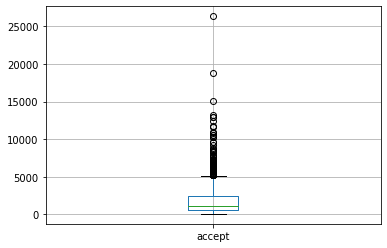

In [ ]:
college2.boxplot('accept')

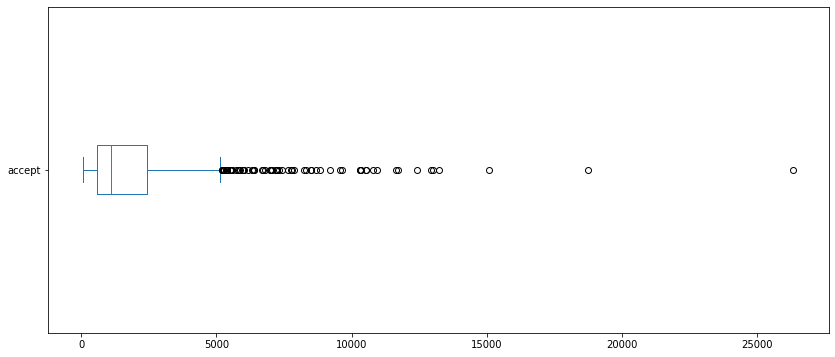

In [ ]:
college2['accept'].plot(kind='box', vert=False, figsize=(14,6))

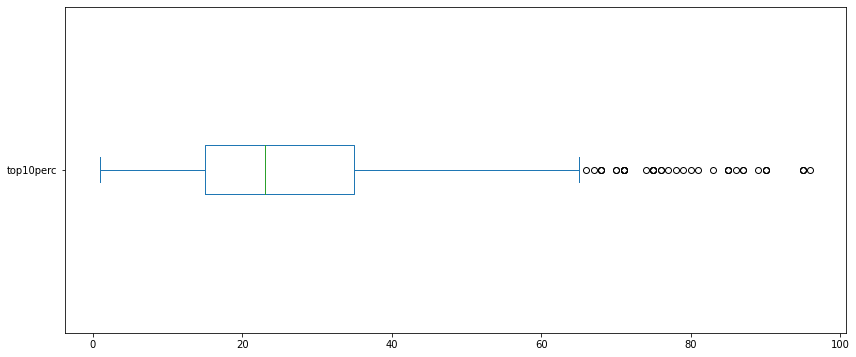

In [ ]:
college2['top10perc'].plot(kind='box', vert=False, figsize=(14,6))

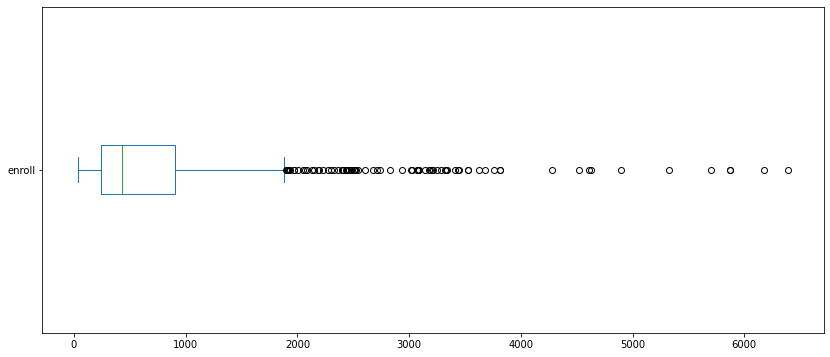

In [ ]:
college2['enroll'].plot(kind='box', vert=False, figsize=(14,6))

In [ ]:
college2.shape

(777, 18)

In [ ]:
# removing outliers - https://www.youtube.com/watch?v=7sJaRHF03K8&list=PLeo1K3hjS3uvCeTYTeyfe0-rN5r8zn9rw&index=41
# Secondary Link -  https://www.youtube.com/watch?v=Vc4cXIAa69Y
# IQR = Q3-Q1, Lower Bound = Q1 - IQR*1.5, Upper Bound = Q3 + IQR*1.5
# cutoff value for accept = 2424 + 1.5(1820) = 5124
# cutoff value for top10perc = 35 + 1.5(20) = 65
# cutoff value for enroll = 902 + 1.5(660) = 1892

def outliers(df, ft):
  q1 = df[ft].quantile(0.25)
  q3 = df[ft].quantile(0.75)
  IQR = q3-q1

  lower_bound = q1 - 1.5*IQR
  upper_bound = q3 + 1.5*IQR

  ls = college2.index[ (df[ft] < lower_bound) | (df[ft] > upper_bound) ]

  return ls


In [ ]:
# create an empty list to store the output indices from mulitple columns
index_list = []
for feature in ['accept', 'top10perc', 'enroll']:
  index_list.extend(outliers(college2, feature))

In [ ]:
index_list

[23,
 27,
 39,
 59,
 61,
 69,
 87,
 118,
 141,
 176,
 203,
 257,
 269,
 274,
 277,
 278,
 279,
 365,
 366,
 407,
 412,
 418,
 420,
 424,
 432,
 445,
 461,
 483,
 510,
 536,
 560,
 561,
 562,
 563,
 576,
 581,
 605,
 606,
 610,
 611,
 613,
 614,
 619,
 620,
 623,
 624,
 626,
 633,
 634,
 636,
 637,
 640,
 647,
 649,
 651,
 662,
 663,
 664,
 667,
 669,
 675,
 677,
 683,
 685,
 692,
 693,
 694,
 700,
 710,
 713,
 727,
 728,
 743,
 16,
 54,
 60,
 70,
 71,
 86,
 91,
 114,
 137,
 138,
 144,
 158,
 159,
 174,
 191,
 221,
 222,
 250,
 251,
 284,
 354,
 407,
 424,
 446,
 459,
 605,
 606,
 609,
 637,
 651,
 660,
 663,
 693,
 708,
 720,
 725,
 733,
 763,
 775,
 21,
 23,
 27,
 39,
 59,
 61,
 69,
 118,
 141,
 176,
 203,
 222,
 269,
 273,
 274,
 277,
 279,
 288,
 324,
 345,
 365,
 366,
 407,
 412,
 418,
 419,
 420,
 424,
 432,
 436,
 445,
 461,
 483,
 489,
 510,
 536,
 562,
 576,
 581,
 585,
 604,
 605,
 606,
 607,
 610,
 611,
 614,
 619,
 620,
 623,
 624,
 626,
 633,
 634,
 637,
 640,
 642,
 647,
 

In [ ]:
# define a function called "remove" which returns a cleaned dataframe without outliers
def remove(df, ls):
  ls = sorted(set(ls))
  df = df.drop(ls)
  return df

In [ ]:
college2_cleaned = remove(college2, index_list)

In [ ]:
college2_cleaned.shape

(657, 18)

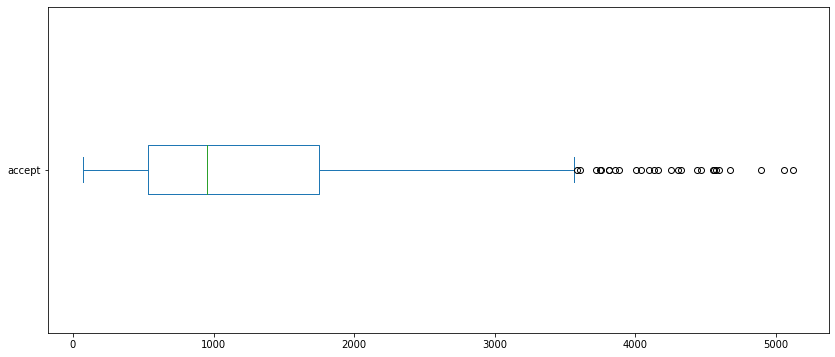

In [ ]:
college2_cleaned['accept'].plot(kind='box', vert=False, figsize=(14,6))

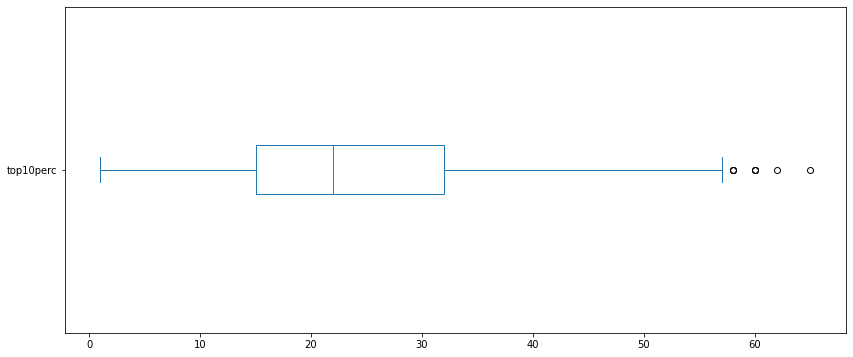

In [ ]:
college2_cleaned['top10perc'].plot(kind='box', vert=False, figsize=(14,6))

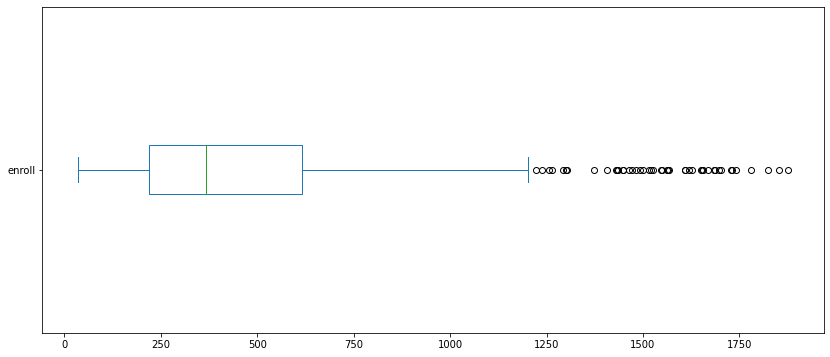

In [ ]:
college2_cleaned['enroll'].plot(kind='box', vert=False, figsize=(14,6))

In [ ]:
college2_cleaned['lp_undergrad'] = np.log(college2_cleaned['p_undergrad'])
college2_cleaned

,apps,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate,private_Yes,lp_undergrad
0,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1,6.285998
1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1,7.112327
2,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1,4.595120
3,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1,4.143135
4,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1,6.767343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
771,2768,2314,682,49,86,2802,86,15884,5370,530,730,92,94,15.2,34,10774,82,1,4.454347
772,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40,0,7.615298
773,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83,1,7.009409
774,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49,1,5.111988


In [ ]:
x = college2_cleaned[['accept', 'top10perc', 'f_undergrad', 'lp_undergrad', 'room_board', 'grad_rate', 'private_Yes']]
y = college2_cleaned['enroll']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=10)

In [ ]:
x_train

,accept,top10perc,f_undergrad,lp_undergrad,room_board,grad_rate,private_Yes
82,587,25,935,5.214936,3070,49,1
313,2092,35,1763,4.077537,4790,69,1
317,484,6,2155,5.252273,4800,100,1
428,2767,50,2587,4.787492,5820,83,1
498,734,26,1433,3.295837,4514,98,1
...,...,...,...,...,...,...,...
416,361,19,879,5.049856,4345,74,1
363,1456,6,3471,6.814543,3798,59,0
595,185,16,484,6.293419,5208,78,1
146,216,16,534,5.147494,3800,42,1


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
print(model.coef_)

[  0.15901351   0.73868201   0.10301033   0.33066419  -0.03384337
   0.24176917 -14.19538293]


In [ ]:
print(model.intercept_)

171.30417313481462


In [ ]:
r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.9130335419413458


In [ ]:
pd.DataFrame(model.coef_, x.columns, columns = ['Coeff'])

,Coeff
accept,0.159014
top10perc,0.738682
f_undergrad,0.103010
lp_undergrad,0.330664
room_board,-0.033843
grad_rate,0.241769
private_Yes,-14.195383


In [ ]:
predictions = model.predict(x_test)

In [ ]:
from sklearn import metrics

In [ ]:
metrics.mean_absolute_error(y_test, predictions)

67.51604657663796

In [ ]:
metrics.mean_squared_error(y_test, predictions)

15335.793447233707

In [ ]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

123.83777068097483

In [ ]:
# Another package to run linear regression
import statsmodels.api as sm
x = sm.add_constant(x)
reg = sm.OLS(y_train, x_train).fit()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
print(reg.summary())

                                 OLS Regression Results                                
Dep. Variable:                 enroll   R-squared (uncentered):                   0.969
Model:                            OLS   Adj. R-squared (uncentered):              0.969
Method:                 Least Squares   F-statistic:                              2022.
Date:                Thu, 29 Dec 2022   Prob (F-statistic):                        0.00
Time:                        15:50:19   Log-Likelihood:                         -2814.3
No. Observations:                 459   AIC:                                      5643.
Df Residuals:                     452   BIC:                                      5672.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [ ]:
reg.params

accept           0.150965
top10perc        1.065453
f_undergrad      0.107032
lp_undergrad    12.196681
room_board      -0.025754
grad_rate        0.922924
private_Yes      8.057050
dtype: float64

In [ ]:
# Model valuation: confusion matrix
from sklearn.metrics import confusion_matrix
# Model prediction based on the valuation dataset
prediction_prob = reg.predict(x_test)
prediction = list(map(round, prediction_prob))
confusion_matrix(y_test,prediction)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])